# 第２章　予測的モデリングの各手法を確認する

## 1. 消費者選択の理論

### 多項ロジットモデル

$$p ( y | x ) = \frac { \exp \left( \theta _ { y } ^ { T } x \right) } { \sum _ { c = 1 } ^ { C } \exp \left( \theta _ { c } ^ { T } x \right) }$$

→パラメータを学習するために、以下の対数尤度関数を最大化

$\begin{aligned} \log l ( \theta ) = & \sum _ { n = 1 } ^ { n } \log p \left( x _ { n } , y _ { n } | \theta \right) \\ = & \sum _ { n = 1 } ^ { N } \log \frac { \exp \left( \theta _ { y _ { n } } ^ { T } x _ { n } \right) } { \sum _ { c = 1 } ^ { C } \exp \left( \theta _ { c } ^ { T } x _ { n } \right) } \\ = & \sum _ { n = 1 } ^ { N } \left[ \theta _ { y _ { n } } ^ { T } x _ { n } - \log \sum _ { c = 1 } ^ { C } \exp \left( \theta _ { c } ^ { T } x _ { n } \right) \right] \end{aligned}$

→対数尤度関数の偏微分を計算<br>
$\frac { \partial \theta _ { y _ { n } } ^ { T } x _ { n } } { \partial \theta _ { c } } = \left[ c = y _ { n } \right] x _ { n }$<br>
$ { \partial \log \sum _ { c = 1 } ^ { C } \exp \left( \theta _ { c } ^ { T } x _ { n } \right) } { \partial \theta _ { c } } = \frac { x _ { n } \exp \left( \theta _ { c } ^ { T } x _ { n } \right) } { \sum _ { c = 1 } ^ { C } \exp \left( \theta _ { c } ^ { T } x _ { n } \right) }$<br>
$= x _ { n } p ( c | x _ { n } )$

→まとめると<br>
$$\frac { \partial \log l ( \theta ) } { \partial \theta } = \sum _ { n = 1 } ^ { N } \left[ \left[ c = y _ { n } \right] x _ { n } - x _ { n } p ( c | x _ { n } ) \right]$$

偏微分が求まったので、θを適当な値に初期化して、勾配法で対数尤度関数を最適化することができます。

### using package

In [28]:
# 必要なライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

UsageError: Line magic function `%` not found.


In [22]:
# brest_cancerデータセットの読み込み
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [23]:
# データをDataFrameに変換
df_data = pd.DataFrame(bc.data, columns=bc.feature_names)
df_target = pd.DataFrame(bc.target, columns=['class'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
# 説明変数と目的変数を指定
X = df.loc[:, ['worst perimeter', 'mean concave points']].values
y = df.loc[:, ['class']].values
# scikit-learnの仕様に合わせて､一列のベクトルに変換
y = y.reshape(-1)

In [25]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [26]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [31]:
# 多項ロジスティック回帰の実行
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

In [32]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


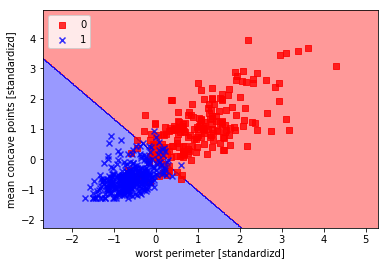

In [35]:
# 決定境界を出力
plot_decision_regions(X_std, y, lr)
plt.xlabel("worst perimeter [standardizd]")
plt.ylabel("mean concave points [standardizd]")
plt.legend(loc = "upper left")
plt.show()

In [34]:
# 正答率を出力
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.932
test acc: 0.936


### from scrach(間違ってる気がする）

In [37]:
import numpy as np

class MultinomialLogit:
    def __init__(self):
        self.C = 0
        self.N = 0
        self.D = 0
        self.theta = None
    
    def prob(self, X, y):
        return np.dot(self.theta[y], X) / sum(np.dot(self.theta[c], X) for c in range(self.C))

    def logLiklihood(self, X, y):
        return sum(np.log(self.prob(X[n], y[n])) for n in range(self.N))
 
    def fit(self, X, y, iter=200):
        self.C = len(set(y))
        self.N = len(X)
        self.D = len(X[0])+1   # bias term is added
        self.theta = np.random.rand(self.C, self.D);
        
        bias = np.ones((len(X), 1))
        X = np.hstack((X, bias))

    def delta(a, b):
        return 1.0 if a == b else 0.0
  
        for i in range(iter):
            for c in range(self.C):
                gradient = sum((delta(c, y[n]) - self.prob(X[n], c)) * X[n] for n in range(self.N)) 
                self.theta[c] += gradient
                print ("i=%d %f" % (i, self.logLiklihood(X, y)))
    
    def predict(self, X):
        bias = np.ones((len(X), 1))
        X = np.hstack((X, bias))
        return [np.argmax([self.prob(x, c) for c in range(self.C)]) for x in X]

    def score(self, X, y):
        Ypred = self.predict(X)
        comp = Ypred == y
        return sum(comp) / len(comp)

In [38]:
if __name__ == '__main__':
        logit = MultinomialLogit()
        logit.fit(X_train,y_train, iter=1000)
        # 正答率を出力
        print('train acc: %.3f' % logit.score(X_train, y_train))
        print('test acc: %.3f' % logit.score(X_test, y_test))

train acc: 0.440
test acc: 0.433


参考）http://techtipshoge.blogspot.com/2016/08/blog-post_15.html

## 2. 生存率分析

参考）http://www012.upp.so-net.ne.jp/doi/biostat/CT39/Cox.pdf

### ハザード関数<br>
生存時間TTの分布関数をF(t)、密度関数をf(t)とし、生存時間関数をS(t)とすると、これらは下記のように表せます。

$\begin{aligned} S ( t ) & = \operatorname { Pr } \{ T \geq t \} \\ F ( t ) & = 1 - S ( t ) \\ f ( t ) & = \frac { d F ( t ) } { d t } \end{aligned}$

ハザード関数と生存関数の関係は

$S ( t ) = \exp \left( - \int _ { 0 } ^ { t } \lambda ( u ) d u \right)$

### ①比例ハザードモデル
<strong>明示的なハザード関数を与えずにデータから生存関数を推定するノンパラメトリック方法</strong><br>
Cox比例ハザードモデルは部分尤度による計算とKM法を組み合わせてモデルを推定

In [40]:
data = pd.read_csv("mastectomy.csv", index_col=0)
data["metastized"] = [1 if k == "yes" else 0 for k in data["metastized"].values]
data.head()

,time,event,metastized
1,23,True,0
2,47,True,0
3,69,True,0
4,70,False,0
5,100,False,0


n=44, number of events=26

             coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95   
metastized 0.8516     2.3434    0.5022 1.6957 0.0899     -0.1327      1.8360  .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.595
Likelihood ratio test = 3.354 on 1 df, p=0.06704


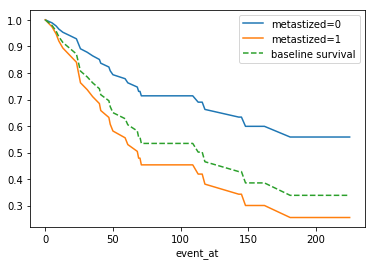

In [44]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col="time", event_col="event")
cph.print_summary()
cph.plot_covariate_groups('metastized', [0, 1])

ベースラインハザードと比較すれば、転移による影響がどのように表れてくるのか把握することができます

参考）https://qiita.com/MorinibuTakeshi/items/f637e22d5cf216d9974b